# INFO 2950: Final Project

## Theresa Cho and Ian Wilkie-Tomasik

In [8]:
import re
from collections import Counter, OrderedDict
import numpy as np
from sklearn import metrics
from numpy import dot
from numpy.linalg import norm
from statistics import stdev
import pandas
from copy import copy, deepcopy
import random
from matplotlib import pyplot

### Preprocessing Data

#### Functions

In [9]:
def create_wordlist(file_name):
    #Creates and returns a list of all the words that occur in the novel, including dupes
    #file_name is of format: r'<file_name>.txt'
    wordlist = []
    with open(file_name) as novel:
        inside_novel = False #want to skip the title page of novel
        for line in novel:
            if line.find("CHAPTER ") != -1:
                inside_novel = True
            if line.find("CHAPTER ") == -1 and inside_novel: #inside novel. Don't include CHAPTER headings
                line_wordlist = re.findall("[A-Za-z]+", line)
                wordlist += line_wordlist
    return wordlist

In [10]:
def create_wordlist2(file_name):
    #For A Christmas Carol
    #Creates and returns a list of all the words that occur in the novel, including dupes
    #file_name is of format: r'<file_name>.txt'
    wordlist = []
    with open(file_name) as novel:
        inside_novel = False #want to skip the title page of novel
        for line in novel:
            if line.find("STAVE ") != -1:
                inside_novel = True
            if line.find("STAVE ") == -1 and inside_novel: #inside novel. Don't include CHAPTER headings
                line_wordlist = re.findall("[A-Za-z]+", line)
                wordlist += line_wordlist
    return wordlist

In [11]:
def homogenize_wordlist(wordlist):
    #make every entry lowercase to make Counter have easier time later on and returns new wordlist without articles
    for i in range(len(wordlist)):
        wordlist[i] = wordlist[i].lower()
    return remove_articles(wordlist)

def remove_articles(wordlist):
    #Returns a new_wordlist without any articles ['a', 'the', 'an'] b/c these are commonly used and would cause noise
    articles = ['a', 'the', 'an']
    new_wordlist = []
    for word in wordlist:
        if word not in articles:
            new_wordlist.append(word)
    return new_wordlist

#### Emily Bronte

In [12]:
wuthering_heights_dupe_wordlist = create_wordlist(r'wuthering_heights_eb.txt')
last_word_ind = wuthering_heights_dupe_wordlist.index("END")
wuthering_heights_dupe_wordlist = wuthering_heights_dupe_wordlist[:last_word_ind] 

#### Charlotte Bronte

In [13]:
jane_eyre_dupe_wordlist = create_wordlist(r'jane_eyre_cb.txt') 
last_word_ind = jane_eyre_dupe_wordlist.index("END")
jane_eyre_dupe_wordlist = jane_eyre_dupe_wordlist[:last_word_ind] 

In [14]:
villette_dupe_wordlist = create_wordlist(r'villette_cb.txt')
last_word_ind = villette_dupe_wordlist.index("END")
villette_dupe_wordlist = villette_dupe_wordlist[:last_word_ind + 1] 

In [15]:
shirley_dupe_wordlist = create_wordlist(r'shirley_cb.txt')
last_word_ind = shirley_dupe_wordlist.index("END")
shirley_dupe_wordlist = shirley_dupe_wordlist[:last_word_ind + 1] 


In [16]:
the_professor_dupe_wordlist = create_wordlist(r'the_professor_cb.txt')
the_professor_dupe_wordlist.index("THE", 560)
the_professor_dupe_wordlist = the_professor_dupe_wordlist[575:] #removed preface
last_word_ind = the_professor_dupe_wordlist.index("END")
the_professor_dupe_wordlist = the_professor_dupe_wordlist[:last_word_ind] 
the_professor_dupe_wordlist = the_professor_dupe_wordlist[:-15]

#### Anne Bronte

In [17]:
wildfell_dupe_wordlist = create_wordlist(r'wildfell_ab.txt')
last_word_ind = wildfell_dupe_wordlist.index("STANINGLEY")
wildfell_dupe_wordlist = wildfell_dupe_wordlist[:last_word_ind] 

In [18]:
agnes_grey_dupe_wordlist = create_wordlist(r'agnes_grey_ab.txt')
last_word_ind = agnes_grey_dupe_wordlist.index("END")
agnes_grey_dupe_wordlist = agnes_grey_dupe_wordlist[:last_word_ind] 
agnes_grey_dupe_wordlist = agnes_grey_dupe_wordlist[:-8]

#### Charles Dickens

In [19]:
a_christmas_carol_dupe_wordlist = create_wordlist2(r'a_christmas_carol_cd.txt')
last_word_ind = a_christmas_carol_dupe_wordlist.index("End")

a_christmas_carol_dupe_wordlist = a_christmas_carol_dupe_wordlist[:last_word_ind] #just novel part

In [20]:
david_copperfield_dupe_wordlist = create_wordlist(r'david_copperfield_cd.txt')
last_word_ind = david_copperfield_dupe_wordlist.index("END")
david_copperfield_dupe_wordlist = david_copperfield_dupe_wordlist[:last_word_ind] 
david_copperfield_dupe_wordlist = david_copperfield_dupe_wordlist[:-12] #just novel part

In [21]:
oliver_twist_dupe_wordlist = create_wordlist(r'oliver_twist_cd.txt')
last_word_ind = oliver_twist_dupe_wordlist.index("END")
oliver_twist_dupe_wordlist = oliver_twist_dupe_wordlist[:last_word_ind] 
oliver_twist_dupe_wordlist = oliver_twist_dupe_wordlist[:-12] #just novel part

#### Homogenize WordLists for Processing (lowercase, w/o articles)

In [22]:
#Homogenize wordlist for processing
wuthering_heights_wordlist = homogenize_wordlist(wuthering_heights_dupe_wordlist)
jane_eyre_wordlist = homogenize_wordlist(jane_eyre_dupe_wordlist)
villette_wordlist = homogenize_wordlist(villette_dupe_wordlist)
shirley_wordlist = homogenize_wordlist(shirley_dupe_wordlist)
the_professor_wordlist = homogenize_wordlist(the_professor_dupe_wordlist)
wildfell_wordlist = homogenize_wordlist(wildfell_dupe_wordlist)
agnes_grey_wordlist = homogenize_wordlist(agnes_grey_dupe_wordlist)
a_christmas_carol_wordlist = homogenize_wordlist(a_christmas_carol_dupe_wordlist)
david_copperfield_wordlist = homogenize_wordlist(david_copperfield_dupe_wordlist)
oliver_twist_wordlist = homogenize_wordlist(oliver_twist_dupe_wordlist)

####  Create Dictionaries (Counter Objects) for each Book

In [24]:
wuthering_heights_dict = Counter(wuthering_heights_wordlist)
jane_eyre_dict = Counter(jane_eyre_wordlist)
villette_dict = Counter(villette_wordlist)
shirley_dict = Counter(shirley_wordlist)
the_professor_dict = Counter(the_professor_wordlist)
wildfell_dict = Counter(wildfell_wordlist)
agnes_grey_dict = Counter(agnes_grey_wordlist)
a_christmas_carol_dict = Counter(a_christmas_carol_wordlist)
david_copperfield_dict = Counter(david_copperfield_wordlist)
oliver_twist_dict = Counter(oliver_twist_wordlist)


#### Create Total Dictionary for all Books

In [25]:
all_books = wuthering_heights_dict + jane_eyre_dict + villette_dict + shirley_dict + the_professor_dict
+ wildfell_dict + agnes_grey_dict + a_christmas_carol_dict + david_copperfield_dict + oliver_twist_dict
print(len(all_books))


24821


In [26]:
#order all_books from most frequent to least frequent
from collections import OrderedDict
all_books = OrderedDict(all_books.most_common())


#### Create a Matrix for each of the Word Counts in each book

In [27]:
word_count_matrix = np.zeros((24821,10))

book_dict = Counter()

def matrix_insert(num):
    
    if num == 0:
        book_dict = wuthering_heights_dict
    elif num == 1:
        book_dict = jane_eyre_dict
    elif num == 2:
        book_dict = villette_dict
    elif num == 3:
        book_dict = shirley_dict
    elif num == 4:
        book_dict = the_professor_dict
    elif num == 5:
        book_dict = wildfell_dict
    elif num == 6:
        book_dict = agnes_grey_dict
    elif num == 7:
        book_dict = a_christmas_carol_dict
    elif num == 8:
        book_dict = david_copperfield_dict
    elif num == 9:
        book_dict = oliver_twist_dict
        
    book_dict_values = book_dict.values()    
    count_list = []
     
    for word in all_books:
        count_list.append(book_dict[word])
    
    for i in range(len(count_list)):
        word_count_matrix[i,num] = count_list[i]

        
for i in range(10):
    matrix_insert(i)

In [29]:
word_count_matrix

array([[  4748.,   6606.,   6405., ...,   1059.,  12278.,   5395.],
       [  4128.,   7244.,   5926., ...,    364.,  13424.,   1870.],
       [  3536.,   5190.,   4803., ...,    677.,  10433.,   3944.],
       ..., 
       [     0.,      0.,      0., ...,      0.,      0.,      0.],
       [     0.,      0.,      0., ...,      0.,      0.,      0.],
       [     0.,      0.,      0., ...,      0.,      0.,      0.]])

#### Create a matrix of proportions of each word per novel

In [32]:
def prop_novel_vector_generator(raw_count_novel_vector, all_books_vals): 
    #Returns array of props for each word in a novel
    prop_vector = []
    word_ind = 0
    raw_count_novel_vector_sum = raw_count_novel_vector.sum()
    for i in range(len(raw_count_novel_vector)):
        prop = raw_count_novel_vector[i]/raw_count_novel_vector_sum
        prop_vector.append(prop)
    return prop_vector

In [33]:
prop_matrix = np.zeros((24821,10))
for num in range(10):
    if num == 0:
        prop_novel_vector = prop_novel_vector_generator(word_count_matrix[:, num], all_books_vals)
    elif num == 1:
        prop_novel_vector = prop_novel_vector_generator(word_count_matrix[:, num], all_books_vals)
    elif num == 2:
        prop_novel_vector = prop_novel_vector_generator(word_count_matrix[:, num], all_books_vals)
    elif num == 3:
        prop_novel_vector = prop_novel_vector_generator(word_count_matrix[:, num], all_books_vals)
    elif num == 4:
        prop_novel_vector = prop_novel_vector_generator(word_count_matrix[:, num], all_books_vals)
    elif num == 5:
        prop_novel_vector = prop_novel_vector_generator(word_count_matrix[:, num], all_books_vals)
    elif num == 6:
        prop_novel_vector = prop_novel_vector_generator(word_count_matrix[:, num], all_books_vals)
    elif num == 7:
        prop_novel_vector = prop_novel_vector_generator(word_count_matrix[:, num], all_books_vals)
    elif num == 8:
        prop_novel_vector = prop_novel_vector_generator(word_count_matrix[:, num], all_books_vals)
    elif num == 9:
        prop_novel_vector = prop_novel_vector_generator(word_count_matrix[:, num], all_books_vals)
        
    for i in range(len(prop_novel_vector)):
        prop_matrix[i,num] = prop_novel_vector[i]
prop_matrix

array([[ 0.04235164,  0.03763395,  0.03479598, ...,  0.04094653,
         0.03734253,  0.03774654],
       [ 0.03682131,  0.04126859,  0.03219375, ...,  0.01407416,
         0.040828  ,  0.0130836 ],
       [ 0.03154073,  0.02956709,  0.02609291, ...,  0.02617639,
         0.03173111,  0.02759451],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

#### Descriptive Statstics for Word Proportions

In [34]:
prop_mean_vector = prop_matrix.mean(1)
prop_std_dev_vector = prop_matrix.std(1)

### Obtain the cosine similarity between each of the novels

In [30]:
def cosine_similarity(a,b):
    cos_sim = np.inner(a, b) / (norm(a) * norm(b))
    return cos_sim

def novel_cosine_similarity(matrix): #Returns and prints cosine similarity for every novel combo 
    
    wuthering_heights_jane_eyre = cosine_similarity(matrix[:,0], matrix[:,1])
    print("wuthering_heights_jane_eyre", wuthering_heights_jane_eyre)

    wuthering_heights_villette = cosine_similarity(matrix[:,0],matrix[:,2])
    print("wuthering_heights_villette", wuthering_heights_villette)

    wuthering_heights_shirley = cosine_similarity(matrix[:,0],matrix[:,3])
    print("wuthering_heights_shirley", wuthering_heights_shirley)

    wuthering_heights_the_professor = cosine_similarity(matrix[:,0],matrix[:,4])
    print("wuthering_heights_the_professor", wuthering_heights_the_professor)

    wuthering_heights_wildfell = cosine_similarity(matrix[:,0],matrix[:,5])
    print("wuthering_heights_wildfell", wuthering_heights_wildfell)

    wuthering_heights_agnes_grey = cosine_similarity(matrix[:,0],matrix[:,6])
    print("wuthering_heights_agnes_grey", wuthering_heights_agnes_grey)

    wuthering_heights_a_christmas_carol = cosine_similarity(matrix[:,0],matrix[:,7])
    print("wuthering_heights_a_christmas_carol", wuthering_heights_a_christmas_carol)

    wuthering_heights_david_copperfield = cosine_similarity(matrix[:,0],matrix[:,8])
    print("wuthering_heights_david_copperfield", wuthering_heights_david_copperfield)

    wuthering_heights_oliver_twist = cosine_similarity(matrix[:,0],matrix[:,9])
    print("wuthering_heights_oliver_twist", wuthering_heights_oliver_twist)

    jane_eyre_villette = cosine_similarity(matrix[:,1],matrix[:,2])
    print("jane_eyre_villette", jane_eyre_villette)

    jane_eyre_shirley = cosine_similarity(matrix[:,1],matrix[:,3])
    print("jane_eyre_shirley", jane_eyre_shirley)

    jane_eyre_the_professor = cosine_similarity(matrix[:,1],matrix[:,4])
    print("jane_eyre_the_professor", jane_eyre_the_professor)

    jane_eyre_wildfell = cosine_similarity(matrix[:,1],matrix[:,5])
    print("jane_eyre_wildfell", jane_eyre_wildfell)

    jane_eyre_agnes_grey = cosine_similarity(matrix[:,1],matrix[:,6])
    print("jane_eyre_agnes_grey", jane_eyre_agnes_grey)

    jane_eyre_a_christmas_carol = cosine_similarity(matrix[:,1],matrix[:,7])
    print("jane_eyre_a_christmas_carol", jane_eyre_a_christmas_carol)

    jane_eyre_david_copperfield = cosine_similarity(matrix[:,1],matrix[:,8])
    print("jane_eyre_david_copperfield", jane_eyre_david_copperfield)

    jane_eyre_oliver_twist = cosine_similarity(matrix[:,1],matrix[:,9])
    print("jane_eyre_oliver_twist", jane_eyre_oliver_twist)

    villette_shirley = cosine_similarity(matrix[:,2],matrix[:,3])
    print("villette_shirley", villette_shirley)

    villette_the_professor = cosine_similarity(matrix[:,2],matrix[:,4])
    print("villette_the_professor", villette_the_professor)

    villette_the_wildfell = cosine_similarity(matrix[:,2],matrix[:,5])
    print("villette_the_wildfell", villette_the_wildfell)

    villette_agnes_grey = cosine_similarity(matrix[:,2],matrix[:,6])
    print("villette_agnes_grey", villette_agnes_grey)

    villette_a_christmas_carol = cosine_similarity(matrix[:,2],matrix[:,7])
    print("villette_a_christmas_carol", villette_a_christmas_carol)

    villette_david_copperfield = cosine_similarity(matrix[:,2],matrix[:,8])
    print("villette_david_copperfield", villette_david_copperfield)

    villette_oliver_twist = cosine_similarity(matrix[:,2],matrix[:,9])
    print("villette_oliver_twist", villette_oliver_twist)

    shirley_the_professor = cosine_similarity(matrix[:,3],matrix[:,4])
    print("shirley_the_professor", shirley_the_professor)

    shirley_wildfell = cosine_similarity(matrix[:,3],matrix[:,5])
    print("shirley_wildfell", shirley_wildfell)

    shirley_anges_grey = cosine_similarity(matrix[:,3],matrix[:,6])
    print("shirley_anges_grey", shirley_anges_grey)

    shirley_a_christmas_carol = cosine_similarity(matrix[:,3],matrix[:,7])
    print("shirley_a_christmas_carol", shirley_a_christmas_carol)

    shirley_david_copperfield = cosine_similarity(matrix[:,3],matrix[:,8])
    print("shirley_david_copperfield", shirley_david_copperfield)

    shirley_oliver_twist = cosine_similarity(matrix[:,3],matrix[:,9])
    print("shirley_oliver_twist", shirley_oliver_twist)

    the_professor_wildfell = cosine_similarity(matrix[:,4],matrix[:,5])
    print("the_professor_wildfell", the_professor_wildfell)

    the_professor_agnes_grey = cosine_similarity(matrix[:,4],matrix[:,6])
    print("the_professor_agnes_grey", the_professor_agnes_grey)

    the_professor_a_christmas_carol = cosine_similarity(matrix[:,4],matrix[:,7])
    print("the_professor_a_christmas_carol", the_professor_a_christmas_carol)

    the_professor_david_copperfield = cosine_similarity(matrix[:,4],matrix[:,8])
    print("the_professor_david_copperfield", the_professor_david_copperfield)

    the_professor_oliver_twist = cosine_similarity(matrix[:,4],matrix[:,9])
    print("the_professor_oliver_twist", the_professor_oliver_twist)

    wildfell_agnes_grey = cosine_similarity(matrix[:,5],matrix[:,6])
    print("wildfell_agnes_grey", wildfell_agnes_grey)

    wildfell_a_christmas_carol = cosine_similarity(matrix[:,5],matrix[:,7])
    print("wildfell_a_christmas_carol", wildfell_a_christmas_carol)

    wildfell_david_copperfield = cosine_similarity(matrix[:,5],matrix[:,8])
    print("wildfell_david_copperfield", wildfell_david_copperfield)

    wildfell_oliver_twist = cosine_similarity(matrix[:,5],matrix[:,9])
    print("wildfell_oliver_twist", wildfell_oliver_twist)

    agnes_grey_a_christmas_carol = cosine_similarity(matrix[:,6],matrix[:,7])
    print("agnes_grey_a_christmas_carol", agnes_grey_a_christmas_carol)

    agnes_grey_david_copperfield = cosine_similarity(matrix[:,6],matrix[:,8])
    print("agnes_grey_david_copperfield", agnes_grey_david_copperfield)

    agnes_grey_oliver_twist = cosine_similarity(matrix[:,6],matrix[:,9])
    print("agnes_grey_oliver_twist", agnes_grey_oliver_twist)

    a_christmas_carol_david_copperfield = cosine_similarity(matrix[:,7],matrix[:,8])
    print("a_christmas_carol_david_copperfield", a_christmas_carol_david_copperfield)

    a_christmas_carol_oliver_twist = cosine_similarity(matrix[:,7],matrix[:,9])
    print("a_christmas_carol_oliver_twist", a_christmas_carol_oliver_twist)

    david_copperfield_oliver_twist = cosine_similarity(matrix[:,8],matrix[:,9])
    print("david_copperfield_oliver_twist", david_copperfield_oliver_twist)
    
    cosine_list = [wuthering_heights_jane_eyre,
                   wuthering_heights_villette,
                   wuthering_heights_shirley,
                   wuthering_heights_the_professor,
                   wuthering_heights_wildfell,
                   wuthering_heights_agnes_grey,
                   wuthering_heights_a_christmas_carol,
                   wuthering_heights_david_copperfield,
                   wuthering_heights_oliver_twist,
                   jane_eyre_villette,
                   jane_eyre_shirley,
                   jane_eyre_the_professor,
                   jane_eyre_wildfell,
                   jane_eyre_agnes_grey,
                   jane_eyre_a_christmas_carol,
                   jane_eyre_david_copperfield,
                   jane_eyre_oliver_twist,
                   villette_shirley,
                   villette_the_professor,
                   villette_the_wildfell,
                   villette_agnes_grey,
                   villette_a_christmas_carol,
                   villette_david_copperfield,
                   villette_oliver_twist,
                   shirley_the_professor,
                   shirley_wildfell,
                   shirley_anges_grey,
                   shirley_a_christmas_carol,
                   shirley_david_copperfield,
                   shirley_oliver_twist,
                   the_professor_wildfell,
                   the_professor_agnes_grey,
                   the_professor_a_christmas_carol,
                   the_professor_david_copperfield,
                   the_professor_oliver_twist,
                   wildfell_agnes_grey,
                   wildfell_a_christmas_carol,
                   wildfell_david_copperfield,
                   wildfell_oliver_twist,
                   agnes_grey_a_christmas_carol,
                   agnes_grey_david_copperfield,
                   agnes_grey_oliver_twist,
                   agnes_grey_a_christmas_carol,
                   agnes_grey_david_copperfield,
                   agnes_grey_oliver_twist,
                   a_christmas_carol_david_copperfield,
                   a_christmas_carol_oliver_twist,
                   david_copperfield_oliver_twist
                  ]
    
    return cosine_list

def novel_cosine_similarity_noprint(matrix): #No print version of novel_cosine_similarity func
    
    wuthering_heights_jane_eyre = cosine_similarity(matrix[:,0], matrix[:,1])

    wuthering_heights_villette = cosine_similarity(matrix[:,0],matrix[:,2])

    wuthering_heights_shirley = cosine_similarity(matrix[:,0],matrix[:,3])

    wuthering_heights_the_professor = cosine_similarity(matrix[:,0],matrix[:,4])

    wuthering_heights_wildfell = cosine_similarity(matrix[:,0],matrix[:,5])

    wuthering_heights_agnes_grey = cosine_similarity(matrix[:,0],matrix[:,6])

    wuthering_heights_a_christmas_carol = cosine_similarity(matrix[:,0],matrix[:,7])

    wuthering_heights_david_copperfield = cosine_similarity(matrix[:,0],matrix[:,8])

    wuthering_heights_oliver_twist = cosine_similarity(matrix[:,0],matrix[:,9])

    jane_eyre_villette = cosine_similarity(matrix[:,1],matrix[:,2])

    jane_eyre_shirley = cosine_similarity(matrix[:,1],matrix[:,3])

    jane_eyre_the_professor = cosine_similarity(matrix[:,1],matrix[:,4])

    jane_eyre_wildfell = cosine_similarity(matrix[:,1],matrix[:,5])

    jane_eyre_agnes_grey = cosine_similarity(matrix[:,1],matrix[:,6])

    jane_eyre_a_christmas_carol = cosine_similarity(matrix[:,1],matrix[:,7])

    jane_eyre_david_copperfield = cosine_similarity(matrix[:,1],matrix[:,8])

    jane_eyre_oliver_twist = cosine_similarity(matrix[:,1],matrix[:,9])

    villette_shirley = cosine_similarity(matrix[:,2],matrix[:,3])

    villette_the_professor = cosine_similarity(matrix[:,2],matrix[:,4])

    villette_the_wildfell = cosine_similarity(matrix[:,2],matrix[:,5])

    villette_agnes_grey = cosine_similarity(matrix[:,2],matrix[:,6])

    villette_a_christmas_carol = cosine_similarity(matrix[:,2],matrix[:,7])

    villette_david_copperfield = cosine_similarity(matrix[:,2],matrix[:,8])

    villette_oliver_twist = cosine_similarity(matrix[:,2],matrix[:,9])

    shirley_the_professor = cosine_similarity(matrix[:,3],matrix[:,4])

    shirley_wildfell = cosine_similarity(matrix[:,3],matrix[:,5])

    shirley_anges_grey = cosine_similarity(matrix[:,3],matrix[:,6])

    shirley_a_christmas_carol = cosine_similarity(matrix[:,3],matrix[:,7])

    shirley_david_copperfield = cosine_similarity(matrix[:,3],matrix[:,8])

    shirley_oliver_twist = cosine_similarity(matrix[:,3],matrix[:,9])

    the_professor_wildfell = cosine_similarity(matrix[:,4],matrix[:,5])

    the_professor_agnes_grey = cosine_similarity(matrix[:,4],matrix[:,6])

    the_professor_a_christmas_carol = cosine_similarity(matrix[:,4],matrix[:,7])

    the_professor_david_copperfield = cosine_similarity(matrix[:,4],matrix[:,8])

    the_professor_oliver_twist = cosine_similarity(matrix[:,4],matrix[:,9])

    wildfell_agnes_grey = cosine_similarity(matrix[:,5],matrix[:,6])

    wildfell_a_christmas_carol = cosine_similarity(matrix[:,5],matrix[:,7])

    wildfell_david_copperfield = cosine_similarity(matrix[:,5],matrix[:,8])

    wildfell_oliver_twist = cosine_similarity(matrix[:,5],matrix[:,9])

    agnes_grey_a_christmas_carol = cosine_similarity(matrix[:,6],matrix[:,7])

    agnes_grey_david_copperfield = cosine_similarity(matrix[:,6],matrix[:,8])

    agnes_grey_oliver_twist = cosine_similarity(matrix[:,6],matrix[:,9])

    a_christmas_carol_david_copperfield = cosine_similarity(matrix[:,7],matrix[:,8])

    a_christmas_carol_oliver_twist = cosine_similarity(matrix[:,7],matrix[:,9])

    david_copperfield_oliver_twist = cosine_similarity(matrix[:,8],matrix[:,9])
    
    cosine_list = [wuthering_heights_jane_eyre,
                   wuthering_heights_villette,
                   wuthering_heights_shirley,
                   wuthering_heights_the_professor,
                   wuthering_heights_wildfell,
                   wuthering_heights_agnes_grey,
                   wuthering_heights_a_christmas_carol,
                   wuthering_heights_david_copperfield,
                   wuthering_heights_oliver_twist,
                   jane_eyre_villette,
                   jane_eyre_shirley,
                   jane_eyre_the_professor,
                   jane_eyre_wildfell,
                   jane_eyre_agnes_grey,
                   jane_eyre_a_christmas_carol,
                   jane_eyre_david_copperfield,
                   jane_eyre_oliver_twist,
                   villette_shirley,
                   villette_the_professor,
                   villette_the_wildfell,
                   villette_agnes_grey,
                   villette_a_christmas_carol,
                   villette_david_copperfield,
                   villette_oliver_twist,
                   shirley_the_professor,
                   shirley_wildfell,
                   shirley_anges_grey,
                   shirley_a_christmas_carol,
                   shirley_david_copperfield,
                   shirley_oliver_twist,
                   the_professor_wildfell,
                   the_professor_agnes_grey,
                   the_professor_a_christmas_carol,
                   the_professor_david_copperfield,
                   the_professor_oliver_twist,
                   wildfell_agnes_grey,
                   wildfell_a_christmas_carol,
                   wildfell_david_copperfield,
                   wildfell_oliver_twist,
                   agnes_grey_a_christmas_carol,
                   agnes_grey_david_copperfield,
                   agnes_grey_oliver_twist,
                   agnes_grey_a_christmas_carol,
                   agnes_grey_david_copperfield,
                   agnes_grey_oliver_twist,
                   a_christmas_carol_david_copperfield,
                   a_christmas_carol_oliver_twist,
                   david_copperfield_oliver_twist
                  ]
    
    return cosine_list

#### Cosine Similarity of Proportions of ALL words for every combo of novels

In [35]:
novel_cosine_similarity(prop_matrix)

wuthering_heights_jane_eyre 0.970017414684
wuthering_heights_villette 0.9634622171
wuthering_heights_shirley 0.955012459192
wuthering_heights_the_professor 0.951526576875
wuthering_heights_wildfell 0.980140722802
wuthering_heights_agnes_grey 0.967114980778
wuthering_heights_a_christmas_carol 0.89940202443
wuthering_heights_david_copperfield 0.960867120813
wuthering_heights_oliver_twist 0.913809601767
jane_eyre_villette 0.982017354897
jane_eyre_shirley 0.955598345126
jane_eyre_the_professor 0.981293352728
jane_eyre_wildfell 0.984102760368
jane_eyre_agnes_grey 0.978620924433
jane_eyre_a_christmas_carol 0.885670866316
jane_eyre_david_copperfield 0.979590149136
jane_eyre_oliver_twist 0.894864497965
villette_shirley 0.966970901562
villette_the_professor 0.986952720774
villette_the_wildfell 0.972674290736
villette_agnes_grey 0.979099170271
villette_a_christmas_carol 0.914986461178
villette_david_copperfield 0.976763272253
villette_oliver_twist 0.919124623204
shirley_the_professor 0.959690072

[0.97001741468373504,
 0.96346221709971847,
 0.95501245919192701,
 0.95152657687494824,
 0.98014072280225173,
 0.96711498077765434,
 0.89940202443033834,
 0.96086712081278425,
 0.91380960176664694,
 0.98201735489715336,
 0.95559834512574116,
 0.98129335272778473,
 0.98410276036809696,
 0.97862092443314574,
 0.88567086631606706,
 0.97959014913568609,
 0.89486449796505174,
 0.9669709015623178,
 0.98695272077359297,
 0.97267429073554756,
 0.97909917027130533,
 0.91498646117781701,
 0.97676327225278436,
 0.91912462320369936,
 0.95969007282710261,
 0.95448545144303287,
 0.95859977151410336,
 0.91590044288859007,
 0.94694093236841892,
 0.93281309596690343,
 0.96444848770103475,
 0.9726947956200872,
 0.88206883775565725,
 0.97383240079135891,
 0.89584885505410039,
 0.98638991570535928,
 0.8953492298140806,
 0.97313064621391632,
 0.90713170140820221,
 0.90323300128658301,
 0.97525178984443106,
 0.91168706850340209,
 0.90323300128658301,
 0.97525178984443106,
 0.91168706850340209,
 0.9035163016

#### Cosine Similarity of Proportions of top 100 words for every combo of novels

In [36]:
prop_matrix_100 = prop_matrix[0:100, :]
novel_cosine_similarity(prop_matrix_100)

wuthering_heights_jane_eyre 0.977167757046
wuthering_heights_villette 0.97179425581
wuthering_heights_shirley 0.963680758268
wuthering_heights_the_professor 0.959438879193
wuthering_heights_wildfell 0.986618637363
wuthering_heights_agnes_grey 0.974195306964
wuthering_heights_a_christmas_carol 0.910975400771
wuthering_heights_david_copperfield 0.968235992597
wuthering_heights_oliver_twist 0.925782424985
jane_eyre_villette 0.985719309715
jane_eyre_shirley 0.959627536282
jane_eyre_the_professor 0.985153299971
jane_eyre_wildfell 0.987596487819
jane_eyre_agnes_grey 0.982676415815
jane_eyre_a_christmas_carol 0.893674176575
jane_eyre_david_copperfield 0.983829158594
jane_eyre_oliver_twist 0.903528719361
villette_shirley 0.971905133064
villette_the_professor 0.990558149697
villette_the_wildfell 0.977003609801
villette_agnes_grey 0.983801214969
villette_a_christmas_carol 0.924304445888
villette_david_copperfield 0.981923464394
villette_oliver_twist 0.92948925237
shirley_the_professor 0.96485198

[0.97716775704579439,
 0.97179425580996392,
 0.96368075826832789,
 0.95943887919319659,
 0.98661863736288824,
 0.97419530696420908,
 0.91097540077130801,
 0.96823599259741255,
 0.92578242498464614,
 0.9857193097150565,
 0.95962753628186115,
 0.98515329997132206,
 0.98759648781893949,
 0.98267641581452747,
 0.8936741765750037,
 0.98382915859407194,
 0.90352871936136792,
 0.97190513306436044,
 0.99055814969703071,
 0.97700360980120604,
 0.98380121496947726,
 0.92430444588847516,
 0.98192346439441558,
 0.92948925237028701,
 0.96485198797528127,
 0.95908821920803999,
 0.96367124291410822,
 0.92595694329783329,
 0.95209103537470208,
 0.94397370970158456,
 0.96876200164804493,
 0.9773459425438239,
 0.89127039611782732,
 0.97929681870051566,
 0.90612834218490668,
 0.98866605100217386,
 0.90312465157729604,
 0.97626143178135816,
 0.91557262615435231,
 0.91185204183113722,
 0.97891092048091766,
 0.9211846829707937,
 0.91185204183113722,
 0.97891092048091766,
 0.9211846829707937,
 0.909276295029

#### Cosine Similarity of Proportions of top 100-1000 words for every combo of novels

In [37]:
prop_matrix_100_1000 = prop_matrix[100:1001, :]
novel_cosine_similarity(prop_matrix_100_1000)

wuthering_heights_jane_eyre 0.703399915448
wuthering_heights_villette 0.669216236085
wuthering_heights_shirley 0.656959456248
wuthering_heights_the_professor 0.671136061174
wuthering_heights_wildfell 0.750828710381
wuthering_heights_agnes_grey 0.707705659962
wuthering_heights_a_christmas_carol 0.647155246947
wuthering_heights_david_copperfield 0.722197525305
wuthering_heights_oliver_twist 0.687034926275
jane_eyre_villette 0.838853547479
jane_eyre_shirley 0.80752472694
jane_eyre_the_professor 0.827477218959
jane_eyre_wildfell 0.841156382924
jane_eyre_agnes_grey 0.808759756099
jane_eyre_a_christmas_carol 0.747530269824
jane_eyre_david_copperfield 0.840821530232
jane_eyre_oliver_twist 0.772827339284
villette_shirley 0.791246850857
villette_the_professor 0.859542612711
villette_the_wildfell 0.818136287797
villette_agnes_grey 0.805188454743
villette_a_christmas_carol 0.735143170664
villette_david_copperfield 0.812958040318
villette_oliver_twist 0.745789971545
shirley_the_professor 0.7759571

[0.70339991544759162,
 0.6692162360847268,
 0.65695945624839525,
 0.67113606117426294,
 0.75082871038066457,
 0.70770565996210399,
 0.64715524694708004,
 0.72219752530507331,
 0.68703492627464391,
 0.83885354747938168,
 0.80752472693998634,
 0.82747721895875426,
 0.84115638292363015,
 0.80875975609902206,
 0.74753026982427095,
 0.84082153023153805,
 0.77282733928422165,
 0.79124685085735924,
 0.85954261271067345,
 0.81813628779661474,
 0.80518845474270373,
 0.73514317066446278,
 0.81295804031789787,
 0.74578997154510951,
 0.77595716962880068,
 0.79944660525176858,
 0.7769430857442039,
 0.7136306944191726,
 0.7898281165317057,
 0.73567938692419121,
 0.80103269319200299,
 0.79084519685932775,
 0.7126031504636624,
 0.79535724190962287,
 0.73294584852928346,
 0.91187663400875218,
 0.79121515537688658,
 0.89400857882449691,
 0.82719833866687864,
 0.75800735752282222,
 0.87046402933531641,
 0.78148744248032465,
 0.75800735752282222,
 0.87046402933531641,
 0.78148744248032465,
 0.859462872389

### Significance Testing

#### Creating randomized word proportion matrix for ALL words and the cosine similarities for all novel combos

In [38]:
def generate_fake_matrix(Word_Count_Matrix):
    #Randomizing the word count matrix for all words
    fake_word_count_matrix = deepcopy(Word_Count_Matrix)
    for i in range(10):
        #Shuffling counts per novel, or within a col of the fake word count matrix
        cur_col = fake_word_count_matrix[:,i]
        random.shuffle(cur_col)
        fake_word_count_matrix[:,i] = cur_col    
    
    fake_prop_matrix = np.zeros((24821,10)) #creating a randomized word proportion matrix for all words
    for num in range(10):
        if num == 0:
            prop_novel_vector = prop_novel_vector_generator(fake_word_count_matrix[:, num], all_books_vals)
        elif num == 1:
            prop_novel_vector = prop_novel_vector_generator(fake_word_count_matrix[:, num], all_books_vals)
        elif num == 2:
            prop_novel_vector = prop_novel_vector_generator(fake_word_count_matrix[:, num], all_books_vals)
        elif num == 3:
            prop_novel_vector = prop_novel_vector_generator(fake_word_count_matrix[:, num], all_books_vals)
        elif num == 4:
            prop_novel_vector = prop_novel_vector_generator(fake_word_count_matrix[:, num], all_books_vals)
        elif num == 5:
            prop_novel_vector = prop_novel_vector_generator(fake_word_count_matrix[:, num], all_books_vals)
        elif num == 6:
            prop_novel_vector = prop_novel_vector_generator(fake_word_count_matrix[:, num], all_books_vals)
        elif num == 7:
            prop_novel_vector = prop_novel_vector_generator(fake_word_count_matrix[:, num], all_books_vals)
        elif num == 8:
            prop_novel_vector = prop_novel_vector_generator(fake_word_count_matrix[:, num], all_books_vals)
        elif num == 9:
            prop_novel_vector = prop_novel_vector_generator(fake_word_count_matrix[:, num], all_books_vals)
        
        for i in range(len(prop_novel_vector)):
            fake_prop_matrix[i,num] = prop_novel_vector[i]
    return fake_prop_matrix

def generate_fake_cos_sim(): #generates cosine similarities for the randomized word proportion matrix 1000 times
    cos_acc = []
    for i in range(1000):
        fake_matrix = generate_fake_matrix(word_count_matrix)
        fake_cos_list = novel_cosine_similarity_noprint(fake_matrix)
        cos_acc += (fake_cos_list)
    return cos_acc

In [39]:
fake_data_all = generate_fake_cos_sim()
print(fake_data_all)

[0.0049365411334556528, 0.004693974725736327, 0.0040138844293356041, 0.0024772527630441965, 0.0034020289907933914, 0.00359466986453312, 0.0075142571588053524, 0.0035197085336878767, 0.0025884142327614055, 0.004680516449294906, 0.0066411107879538111, 0.0028439782392869844, 0.0036844616802388383, 0.0043616204060176952, 0.0057401271779353646, 0.0030774998179194739, 0.0040721963447302584, 0.010900603364787089, 0.0046782011433938115, 0.0055346781159274407, 0.015325845994184828, 0.0041577920192437667, 0.0043628745241596585, 0.0045777725121044993, 0.0056547853588697914, 0.0039964278791369415, 0.0065162271103780169, 0.013319034837908845, 0.0069252232610198389, 0.0037324288623423372, 0.0029103070379869105, 0.0025597048414903989, 0.0036133681578418867, 0.0041001128324538016, 0.0040620253887352822, 0.00306203486709035, 0.0020702190311000447, 0.003669614228299937, 0.0031503043009457874, 0.0058194372239121564, 0.0089596731360385463, 0.0076122730038217963, 0.0058194372239121564, 0.008959673136038546

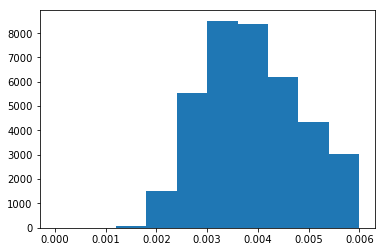

In [40]:
pyplot.hist(fake_data_all, range=(0, 0.006))
pyplot.show()

In [41]:
fake_data_all = np.array(fake_data_all)

mean = fake_data_all.mean()
std = fake_data_all.std()

print(mean)
print(std)

0.00553195474389
0.00635010464904


#### Creating randomized word proportion matrix for 100 most common words and the cosine similarities for all novel combos

In [42]:
def generate_fake_matrix_0_100(Word_Count_Matrix):
    #Randomizing word_count matrix for the 100 most common words
    fake_word_count_matrix = deepcopy(Word_Count_Matrix[0:100, :])
    for i in range(10):
        cur_col = fake_word_count_matrix[:,i]
        random.shuffle(cur_col)
        fake_word_count_matrix[:,i] = cur_col    #Shuffling each col
        
    #Randomizing the word proportion matrix for the 100 most common words
    fake_prop_matrix_0_100 = np.zeros((100,10))
    for num in range(10):
        if num == 0:
            prop_novel_vector = prop_novel_vector_generator(fake_word_count_matrix[:, num], all_books_vals)
        elif num == 1:
            prop_novel_vector = prop_novel_vector_generator(fake_word_count_matrix[:, num], all_books_vals)
        elif num == 2:
            prop_novel_vector = prop_novel_vector_generator(fake_word_count_matrix[:, num], all_books_vals)
        elif num == 3:
            prop_novel_vector = prop_novel_vector_generator(fake_word_count_matrix[:, num], all_books_vals)
        elif num == 4:
            prop_novel_vector = prop_novel_vector_generator(fake_word_count_matrix[:, num], all_books_vals)
        elif num == 5:
            prop_novel_vector = prop_novel_vector_generator(fake_word_count_matrix[:, num], all_books_vals)
        elif num == 6:
            prop_novel_vector = prop_novel_vector_generator(fake_word_count_matrix[:, num], all_books_vals)
        elif num == 7:
            prop_novel_vector = prop_novel_vector_generator(fake_word_count_matrix[:, num], all_books_vals)
        elif num == 8:
            prop_novel_vector = prop_novel_vector_generator(fake_word_count_matrix[:, num], all_books_vals)
        elif num == 9:
            prop_novel_vector = prop_novel_vector_generator(fake_word_count_matrix[:, num], all_books_vals)
        
        for i in range(len(prop_novel_vector)):
            fake_prop_matrix_0_100[i,num] = prop_novel_vector[i]
    return fake_prop_matrix_0_100

def generate_fake_cos_sim_0_100(): #generates cosine similarities for the 100 most common word proportions 1000 times
    cos_acc = []
    for i in range(1000):
        fake_matrix = generate_fake_matrix_0_100(word_count_matrix)
        fake_cos_list = novel_cosine_similarity_noprint(fake_matrix)
        cos_acc += (fake_cos_list)
    return cos_acc

In [43]:
fake_data_0_100 = generate_fake_cos_sim_0_100()
print(fake_data_0_100)

[0.33659533741077052, 0.3276225071903916, 0.42875739361403875, 0.28869156262167889, 0.36882477212812581, 0.39737706881767604, 0.37882823364000112, 0.39666794992329329, 0.33201697930739532, 0.34945808680824059, 0.42191702179116647, 0.32308934650898541, 0.29472828625315578, 0.48414301107556962, 0.30713184034975538, 0.31752953652146682, 0.3657872841179472, 0.29678918601455279, 0.36371417666967221, 0.55113716226218279, 0.32350453386384537, 0.40804770289267045, 0.30052364430034079, 0.40304296359901454, 0.33252309309613931, 0.34980625727716913, 0.48715915682942962, 0.37823146372755834, 0.38502037400425804, 0.36964873836981677, 0.43769732587849236, 0.39379841768689189, 0.41598047642689034, 0.32081471561212621, 0.39300018122654895, 0.41455536769367413, 0.47449619784413877, 0.28156320834758014, 0.36543166967282908, 0.32146897092139332, 0.40357807604980855, 0.35405483077075572, 0.32146897092139332, 0.40357807604980855, 0.35405483077075572, 0.3819060899715474, 0.35968491510294304, 0.3576018481234

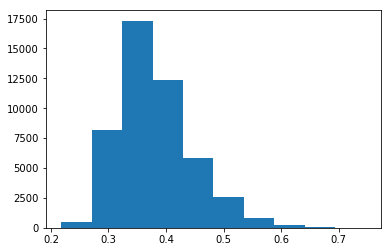

In [44]:
pyplot.hist(fake_data_0_100)
pyplot.show()

In [45]:
fake_data_0_100 = np.array(fake_data_0_100)

mean_0_100 = fake_data_0_100.mean()
std_0_100 = fake_data_0_100.std()

print(mean_0_100)
print(std_0_100)

0.380457332586
0.0644161172604


#### Creating randomized word proportion matrix for 100 to 1000 most common words and the cosine similarities for all novel combos

In [46]:
def generate_fake_matrix_100_1000(Word_Count_Matrix):
    #Randomizing word_count matrix for the top 100 to 1000 most common words
    fake_word_count_matrix = deepcopy(Word_Count_Matrix[100:1001, :])
    for i in range(10):
        cur_col = fake_word_count_matrix[:,i]
        random.shuffle(cur_col)
        fake_word_count_matrix[:,i] = cur_col    #Shuffling each col
    
    #Randomizing word proportion matrix for the top 100 to 1000 most common words
    fake_prop_matrix_100_1000 = np.zeros((901,10))
    for num in range(10):
        if num == 0:
            prop_novel_vector = prop_novel_vector_generator(fake_word_count_matrix[:, num], all_books_vals)
        elif num == 1:
            prop_novel_vector = prop_novel_vector_generator(fake_word_count_matrix[:, num], all_books_vals)
        elif num == 2:
            prop_novel_vector = prop_novel_vector_generator(fake_word_count_matrix[:, num], all_books_vals)
        elif num == 3:
            prop_novel_vector = prop_novel_vector_generator(fake_word_count_matrix[:, num], all_books_vals)
        elif num == 4:
            prop_novel_vector = prop_novel_vector_generator(fake_word_count_matrix[:, num], all_books_vals)
        elif num == 5:
            prop_novel_vector = prop_novel_vector_generator(fake_word_count_matrix[:, num], all_books_vals)
        elif num == 6:
            prop_novel_vector = prop_novel_vector_generator(fake_word_count_matrix[:, num], all_books_vals)
        elif num == 7:
            prop_novel_vector = prop_novel_vector_generator(fake_word_count_matrix[:, num], all_books_vals)
        elif num == 8:
            prop_novel_vector = prop_novel_vector_generator(fake_word_count_matrix[:, num], all_books_vals)
        elif num == 9:
            prop_novel_vector = prop_novel_vector_generator(fake_word_count_matrix[:, num], all_books_vals)
        
        for i in range(len(prop_novel_vector)):
            fake_prop_matrix_100_1000[i,num] = prop_novel_vector[i]
    return fake_prop_matrix_100_1000

def generate_fake_cos_sim_100_1000(): #generates cosine similarities for the 100 to 1000 most common word proportions 1000 times
    cos_acc = []
    for i in range(1000):
        fake_matrix = generate_fake_matrix_100_1000(word_count_matrix)
        fake_cos_list = novel_cosine_similarity_noprint(fake_matrix)
        cos_acc += (fake_cos_list)
    return cos_acc

In [47]:
fake_data_100_1000 = generate_fake_cos_sim_100_1000()
print(fake_data_100_1000)

[0.45957393370968297, 0.47893615955581825, 0.44253384558637582, 0.46344496574581873, 0.43911320599720022, 0.4332817771488266, 0.35411795412108171, 0.4041971022203345, 0.40959864299991783, 0.5522187951820251, 0.53108062904437792, 0.52749263249164413, 0.45513402160855537, 0.45703673377910814, 0.38876210540576422, 0.47092565307402412, 0.4673462119700682, 0.51702095676393334, 0.52758412234719632, 0.49820438076215895, 0.53675025429706547, 0.45158741609111452, 0.4669587717587631, 0.46380721567466315, 0.51702169649872554, 0.50119814487166292, 0.46716902444403574, 0.42146343736981123, 0.4597657657418952, 0.43699091887396285, 0.51454227973405442, 0.47782523882124606, 0.44982736746539748, 0.47149778557980687, 0.46528780799508851, 0.49282116947372684, 0.41844046352570763, 0.45106751499773645, 0.39434827898667457, 0.37191501206667954, 0.41343951121215494, 0.41890554297251026, 0.37191501206667954, 0.41343951121215494, 0.41890554297251026, 0.40284714123454851, 0.32826271649252831, 0.3666339804872857

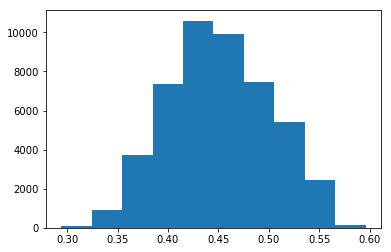

In [48]:
pyplot.hist(fake_data_100_1000)
pyplot.show()

In [49]:
fake_data_100_1000 = np.array(fake_data_0_100)

mean_100_1000 = fake_data_100_1000.mean()
std_100_1000 = fake_data_100_1000.std()

print(mean_100_1000)
print(std_100_1000)

0.380457332586
0.0644161172604


#### Generate z-scores for the different cosine similarities

In [52]:
def generate_z_score(matrix, fake_data_matrix): 
    #Returns list of tuples (bool of significant/not, z-score, ind in novel_cosine_similarity_noprint(matrix))
    cosine_similarities = novel_cosine_similarity_noprint(matrix)
    
    a_mean = fake_data_matrix.mean()
    std_dev = fake_data_matrix.std()
    
    analysis_list = []
    
    for i in range(len(cosine_similarities)):
        cosine_sim = cosine_similarities[i]
        
        z_score = (cosine_sim - a_mean)/std_dev
        
        if z_score >= 1.96 or z_score <= -1.96: #p-val <= 0.05 -- significant
            tuple_elem = (True, z_score, i)
        
            analysis_list.append(tuple_elem)
    
    return analysis_list
    
    
    
    
    
    

In [53]:
#Only shows significant cosine similarities for the 3 subsets of the data
print(generate_z_score(prop_matrix, fake_data_all))
print(generate_z_score(prop_matrix_100, fake_data_0_100))
print(generate_z_score(prop_matrix_100_1000, fake_data_100_1000))

[(True, 151.8849709171819, 0), (True, 150.85267334945408, 1), (True, 149.52202474210009, 2), (True, 148.97307594367231, 3), (True, 153.4791663955279, 4), (True, 151.42790224406616, 5), (True, 140.7646202842013, 6), (True, 150.44400350378024, 7), (True, 143.03349270955519, 8), (True, 153.77469413855283, 9), (True, 149.61428872296267, 10), (True, 153.66067992786128, 11), (True, 154.10309903677137, 12), (True, 153.2398320139541, 13), (True, 138.60226881549653, 14), (True, 153.39246330998913, 15), (True, 140.05006096335993, 16), (True, 151.40521297777849, 17), (True, 154.55190430267024, 18), (True, 152.30336969935252, 19), (True, 153.31514507800449, 20), (True, 143.21882184603624, 21), (True, 152.9472931845911, 22), (True, 143.87049016563012, 23), (True, 150.25864467101511, 24), (True, 149.43903276353888, 25), (True, 150.08694650645575, 26), (True, 143.36275360169824, 27), (True, 148.25093910341948, 28), (True, 146.02611964258415, 29), (True, 151.00798899475862, 30), (True, 152.30659876181